<a href="https://colab.research.google.com/github/Raghu-Priyadarshi/MNIST-Handwritten-Digit-Classification-using-Neural-Network/blob/main/MNIST_Handwritten_Digit_Classification_using_Neural_Networkipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:

# Shape of the numpy arrays
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:

print(X_train[10].shape)

(28, 28)


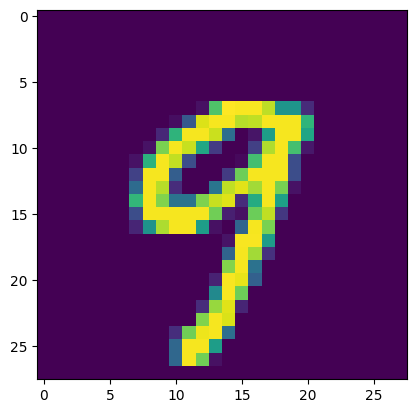

9


In [ ]:
# Displaying the image
plt.imshow(X_train[45])
plt.show()

# Printing the corresponding labe
print(Y_train[45])

In [ ]:
# Scaling the values(also called as normlization)

X_train = X_train/255
X_test = X_test/255



In [ ]:
# Checking the normalization values
print(X_train[25])



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# Setting up the layers of the neural network
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
    ]
)

In [ ]:
from tensorflow.python import metrics
# Compiling the neural network
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
# Training the model
model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2449 - accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1058 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0573 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0380 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0306 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0239 - accuracy: 0.9916
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.01

Checking Accuracy of test data

In [ ]:

loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)




313/313 [==============================] - 2s 5ms/step - loss: 0.1094 - accuracy: 0.9721
0.972100019454956


In [ ]:
print(X_test.shape)

(10000, 28, 28)


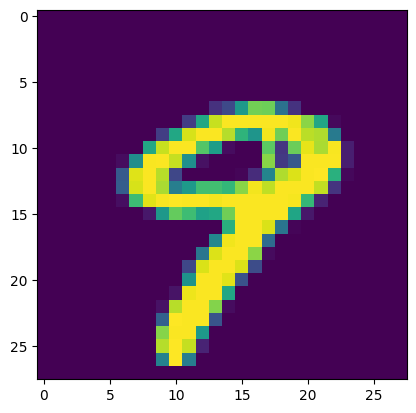

In [ ]:
plt.imshow(X_test[9])
plt.show()


In [ ]:
print(Y_test[9])

9


In [ ]:
Y_pred= model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[2.0057456e-04 1.4148065e-01 3.9941192e-02 9.5006698e-01 8.8622553e-05
 3.3182637e-03 8.2758522e-12 9.9999994e-01 1.1947201e-01 7.0150322e-01]


In [ ]:
# Converting the prediction probabilities to class label 1st value

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
# Converting the prediction probablity to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 5, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 964    0    0    2    1    3    6    2    2    0]
 [   0 1124    0    1    0    1    1    0    7    1]
 [   2    0 1006    4    2    1    1    5   10    1]
 [   0    0    6  976    0   17    0    4    1    6]
 [   0    0    5    0  958    3    2    2    1   11]
 [   2    0    0    7    2  875    0    0    3    3]
 [   1    2    0    1    5   31  912    0    5    1]
 [   0    5   10    8    0    0    0  989    7    9]
 [   1    0    1    7    3   16    0    2  940    4]
 [   0    2    0    8    7    9    1    7    3  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

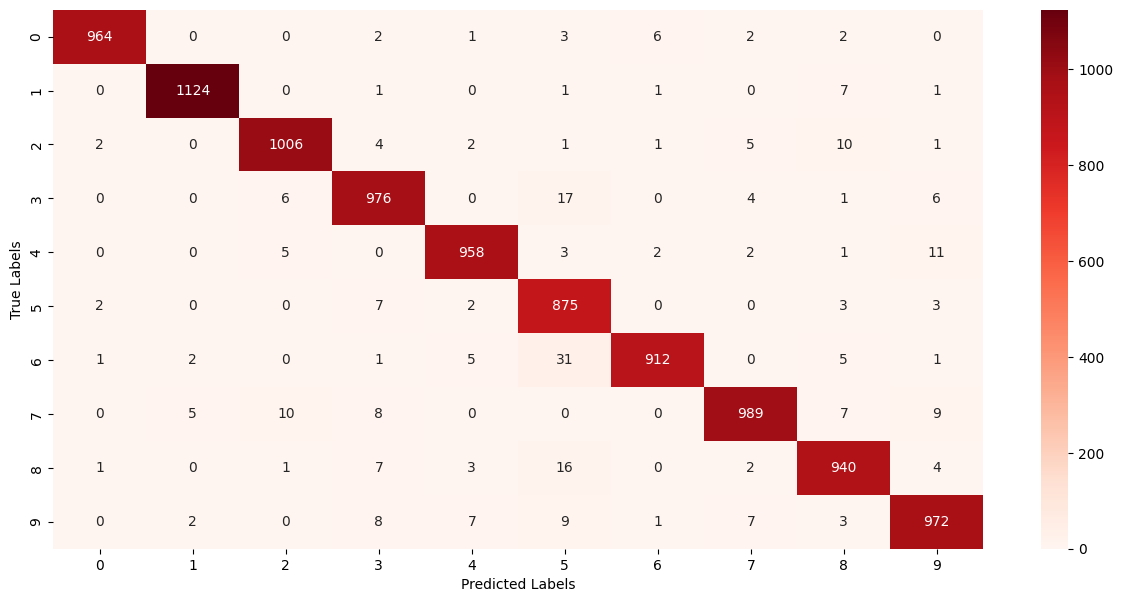

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True , fmt = 'd',cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


In [ ]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)



In [ ]:
type(input_image)

NoneType

In [ ]:
cv2_imshow(input_image)

error: ignored

In [ ]:
input_image.shape

AttributeError: ignored

In [ ]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)


In [ ]:
grayscale.shape

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshape = np.reshape(input_image_resize,[1,28,28])


In [ ]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

In [ ]:
input_pred_label =np.argmax(input_prediction)

In [ ]:
print(input_pred_label)


In [ ]:

input_image_path = input('Path of image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshape)

input_pred_label =np.argmax(input_prediction)

print('The handwritten image matches to: ',input_pred_label)